In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
x = df.drop('species', axis = 1)
y = df["species"]

In [6]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train ,x_test ,y_train ,y_test = train_test_split(x , y, random_state = 0,
                                                    test_size = 0.30)

In [9]:
x_train.shape

(105, 4)

In [10]:
y_train.shape

(105,)

In [11]:
x_test.shape

(45, 4)

In [12]:
y_test.shape

(45,)

In [13]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
y_pred = dt.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [16]:
df1 = pd.DataFrame({"Y Test":y_test,"X Pred":y_pred})

In [17]:
df1

,Y Test,X Pred
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


In [18]:
from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(y_test , y_pred)
dt_acc

0.9777777777777777

## KNN classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
error = []
for n in range(1,106):
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))  

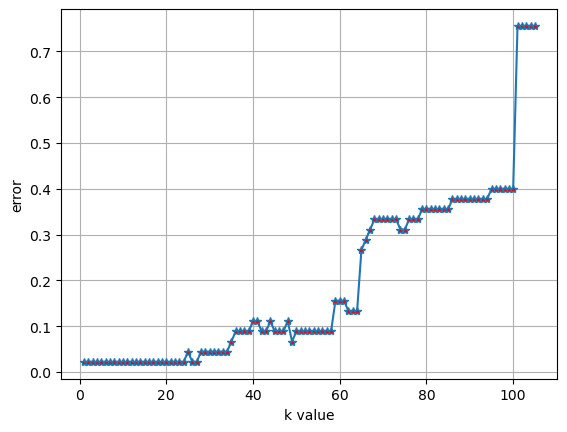

In [22]:
# plot

plt.xlabel('k value')
plt.ylabel('error')

plt.plot(range(1,106), error, marker = '*', mfc = 'red')
plt.grid();

In [23]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [24]:
newdf = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})

In [25]:
newdf

,Y test,Y pred
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


In [26]:
from sklearn.metrics import accuracy_score
kn_acc = accuracy_score(y_test , y_pred)
kn_acc

0.9777777777777777

In [27]:
print("Decision tree accuracy:",dt_acc,"\nKNN accuracy:",kn_acc)

Decision tree accuracy: 0.9777777777777777 
KNN accuracy: 0.9777777777777777


#### serialize

In [29]:
# decision tree

import joblib

In [30]:
# joblib.dump(dt, 'Decision_tree_classifier.joblib')

['Decision_tree_classifier.joblib']

In [60]:
# loading

dt_clf = joblib.load('Decision_tree_classifier.joblib')

In [62]:
dt_clf.predict([[5.2, 3.2, 1.4, 0.7]])

array(['setosa'], dtype=object)

In [66]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [88]:
from tkinter import *
from tkinter.messagebox import messagebox

ImportError: cannot import name 'messagebox' from 'tkinter.messagebox' (/home/aditya/anaconda3/lib/python3.11/tkinter/messagebox.py)

In [86]:
top = Tk()
top.title('IRIS CATEGORIZATION SYSTEM')
top.geometry("900x500")
top.resizable(0, 0)

#Deserialization
classifier = joblib.load('Decision_tree_classifier.joblib')

a = DoubleVar()
b = DoubleVar()
c = DoubleVar()
d = DoubleVar()

def check():
    global a, b, c, d
    new = np.array([[a.get(), b.get(), c.get(), d.get()]])
    new = pd.DataFrame({
        'sepal_length' : [a.get()],
        'sepal_width' : [b.get()],
        'petal_length' : [c.get()],
        'petal_width' : [d.get()]
    })
    y_pred = classifier.predict(new)
    if y_pred[0]== 'setosa':
        tkinter.messagebox.showinfo('Result', "setosa")
    elif y_pred[0] == 'versicolor':
        tkinter.messagebox.showinfo('Result', "versicolor")
    elif y_pred[0] == 'virginica':
        tkinter.messagebox.showinfo('Result', "virginica")
        


Label(top, text="IRIS CLASS CATEGORIZATION SYSTEM", 
      font=('Ubuntu', 25)).place(x=120,y=30)

Label(top, text="sepal_length:", font=('courier', 16)).place(x=20,y=100)
Entry(top, textvariable=a, font=('courier', 16)).place(x=280,y=100)

Label(top, text="sepal_width:", font=('courier', 16)).place(x=20,y=150)
Entry(top, textvariable=b, font=('courier', 16)).place(x=280,y=150)

Label(top, text="petal_length:", font=('courier', 16)).place(x=20,y=200)
Entry(top, textvariable=c, font=('courier', 16)).place(x=280,y=200)

Label(top, text="petal_width",font=('courier', 16)).place(x=20,y=250)
Entry(top, textvariable=d, font=('courier', 16)).place(x=280,y=250)


Button(top, text="--Check--", 
       font=('courier', 16, 'bold'), command=check).place(x=250,y=400)

top.mainloop()